# Open Cluster Memberships using Sigma Clipping

Using <i>Gaia</i> EDR3 data to get membership probabilities of stars in Messier 6

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt

# Read Files
from astropy.io import fits

# Make pretty plots!
from utils import cmd, scatter_mag

# Convenience functions
from utils import univariate_gaussian

In [2]:
plt.rcParams['figure.figsize'] = (6,6)

In [3]:
all_data = fits.getdata("data/M6.fits.gz")

In [4]:
good_stars = (~np.isnan(all_data['bp_rp'])) & (~np.isnan(all_data['phot_g_mean_mag'])) & (all_data['parallax_over_error']>10)

data = all_data[good_stars]

ra, dec, pmra, pmdec, plx = data['ra'], data['dec'], data['pmra'], data['pmdec'], data['parallax']

g, bp_rp, g_rp, bp_g = data['phot_g_mean_mag'], data['bp_rp'], data['g_rp'], data['bp_g']

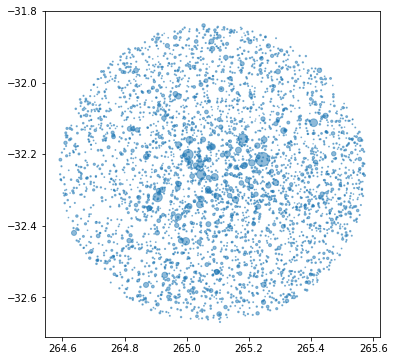

In [5]:
scatter_mag(ra, dec, g, alpha=0.5)

(-20.0, 0.0)

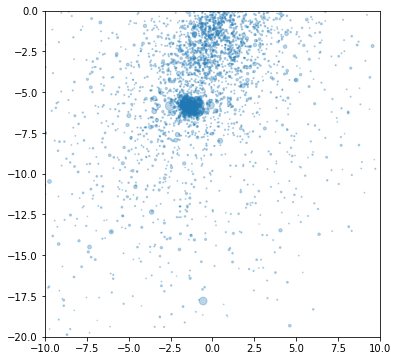

In [6]:
scatter_mag(pmra, pmdec, g, alpha=0.3)
plt.xlim(-10,10)
plt.ylim(-20,0)

In [7]:
from astropy.stats import sigma_clip

In [8]:
pmra_mask = ~sigma_clip(pmra, sigma=2, maxiters=100).mask
pmdec_mask = ~sigma_clip(pmdec, sigma=2, maxiters=100).mask

In [9]:
mask = pmra_mask & pmdec_mask

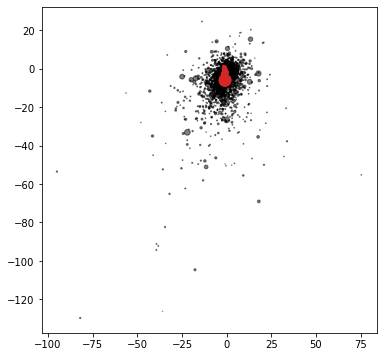

In [10]:
scatter_mag(pmra, pmdec, g, color='k', alpha=0.5)
scatter_mag(pmra[mask], pmdec[mask], g[mask], color='tab:red')

(-20.0, 5.0)

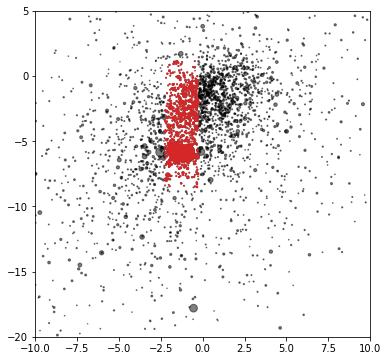

In [11]:
scatter_mag(pmra, pmdec, g, color='k', alpha=0.5)
scatter_mag(pmra[mask], pmdec[mask], g[mask], color='tab:red')
plt.xlim(-10,10)
plt.ylim(-20,5)

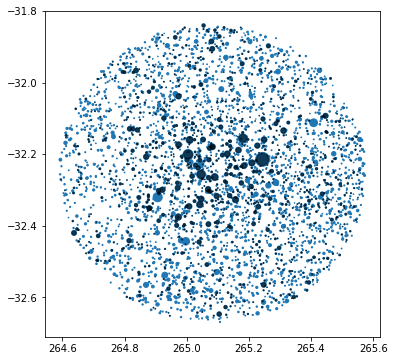

In [12]:
scatter_mag(ra, dec, g, color='tab:blue')
scatter_mag(ra[mask], dec[mask], g[mask], alpha=0.5, color='k')

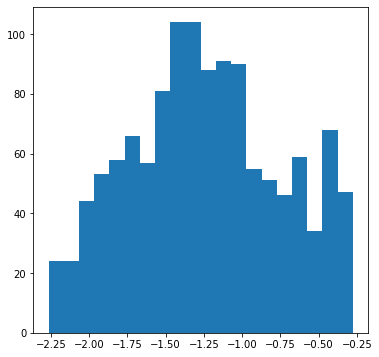

In [13]:
plt.hist(pmra[mask], bins=20);

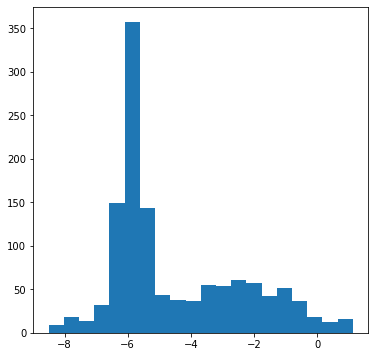

In [14]:
plt.hist(pmdec[mask], bins=20);

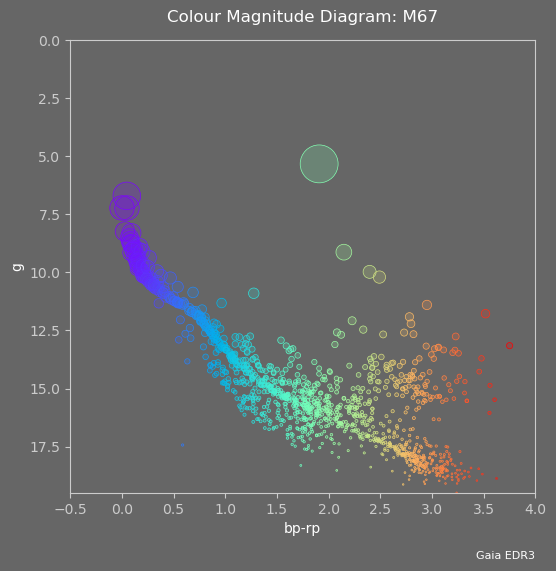

In [15]:
cmd(bp_rp[mask], g[mask], xlim=(-0.5, 4), ylim=(19.5, 0), col_name='bp-rp', name='M67')